In [1]:
import os, json


path = "../data/cuts/"
cuts = [(vid+'/'+cut) for vid in os.listdir(path) for cut in os.listdir(path + vid) if cut.endswith("_signer.json")]

scores = []
for idx, cut in enumerate(cuts):
    with open(path + cut) as datafile:
        line = ""
        while ']' not in line:
            line += datafile.readline()
        line = line[:-2] + '}'
        signer_data = json.loads(line)
    scores.append(signer_data["scores"])

<AxesSubplot:>

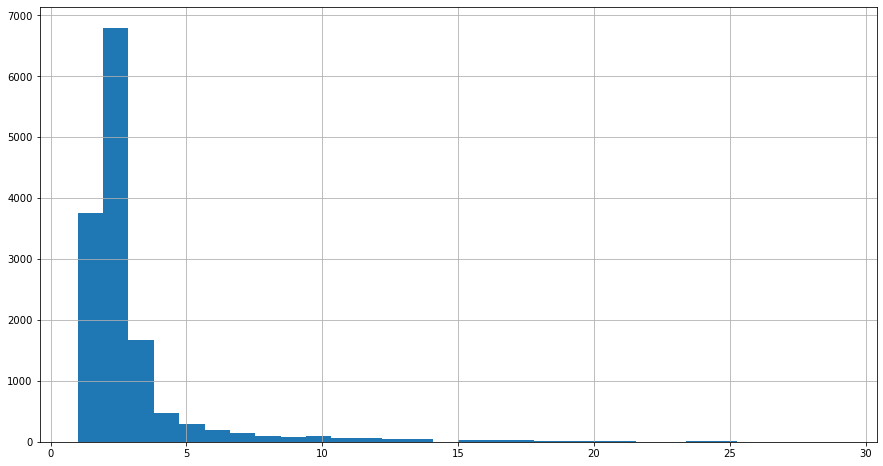

In [2]:
import pandas as pd

scores_s = pd.Series(map(len, scores))
scores_s.hist(bins=30,figsize=(15,8))

<AxesSubplot:>

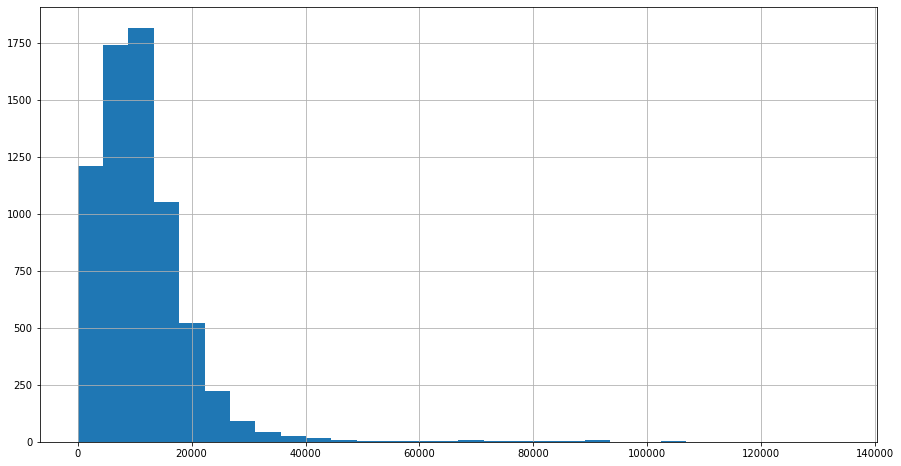

In [3]:
import pandas as pd

def get_score(scores):
    m1 = max(scores)
    scores.remove(m1)
    return m1 - max(scores)

scores_s = pd.Series(map(get_score, filter(lambda s: len(s) == 2, scores)))
scores_s.hist(bins=30,figsize=(15,8))